In [ ]:
!python --version

Python 3.10.12


In [40]:
#while True:pass


In [2]:
# Directive pour afficher les graphiques dans Jupyter
%matplotlib inline

# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import datasets
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten



In [3]:
from sklearn.linear_model import LogisticRegression

In [4]:
!pip install tensorflow

In [5]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


In [6]:
# Importation des données CIFAR10

from keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

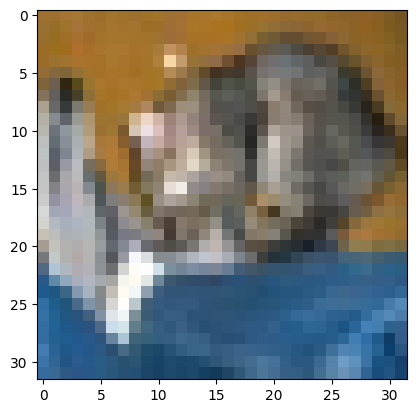

In [8]:
plt.imshow(X_test[0])

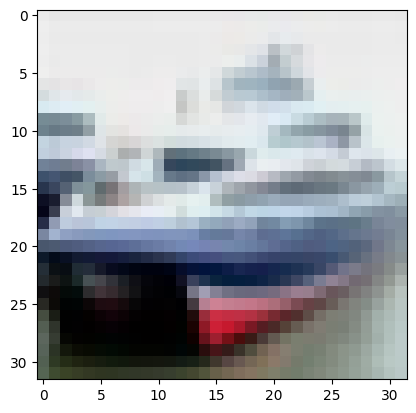

In [9]:
plt.imshow(X_test[1])

In [10]:
labels = ['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
num_classes = 10

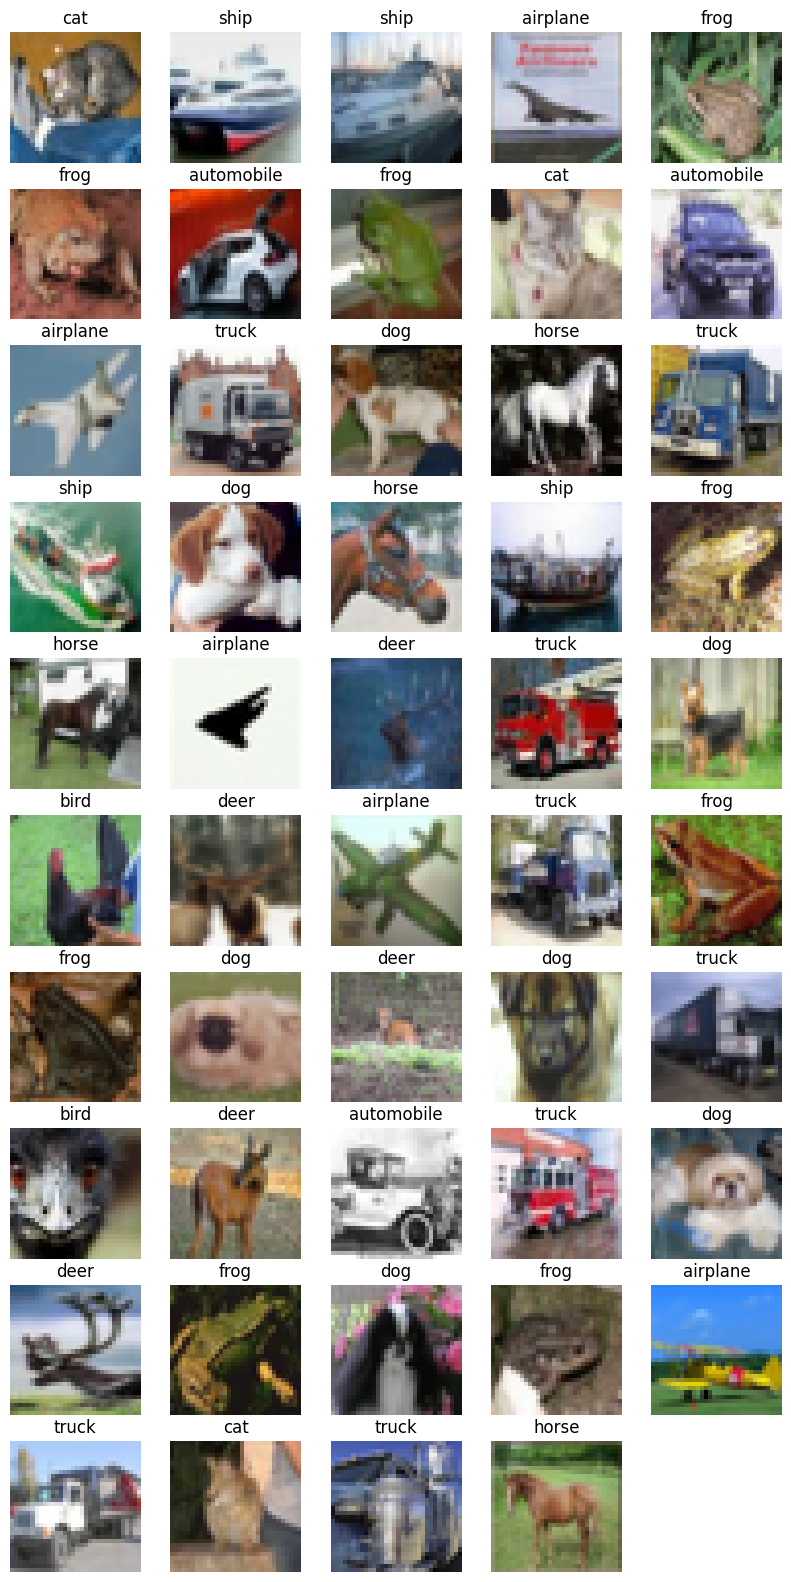

In [11]:
plt.figure(figsize=(10,20))
for i in range(0,49) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X_test[i])
    plt.title(labels[int(y_test[i])])

In [12]:
# Normalisation entre 0 et 1

X_train = X_train / 255
X_test = X_test / 255

In [14]:
y_train1 = to_categorical(y_train)
y_test1 = to_categorical(y_test)

In [15]:
y_train1

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [16]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

## Une couche convolutionnelle

### On va utiliser utiliser une couche convolutionnelle pour l'extraction des caractéristiques, et une couche dense pour la classification :


In [17]:
# Réseau convolutionnel simple

model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(num_classes, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 flatten (Flatten)           (None, 28800)             0         
                                                                 
 dense (Dense)               (None, 10)                288010    
                                                                 
Total params: 288906 (1.10 MB)
Trainable params: 288906 (1.10 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# trainement de model
train = model.fit(X_train, y_train1, validation_data=(X_test, y_test1), epochs=20, batch_size=200, verbose=1)

Epoch 1/20
250/250 [==============================] - 25s 98ms/step - loss: 1.6642 - accuracy: 0.4289 - val_loss: 1.3849 - val_accuracy: 0.5102
Epoch 2/20
250/250 [==============================] - 24s 96ms/step - loss: 1.2897 - accuracy: 0.5577 - val_loss: 1.2875 - val_accuracy: 0.5493
Epoch 3/20
250/250 [==============================] - 26s 105ms/step - loss: 1.1876 - accuracy: 0.5899 - val_loss: 1.2257 - val_accuracy: 0.5699
Epoch 4/20
250/250 [==============================] - 23s 93ms/step - loss: 1.1214 - accuracy: 0.6145 - val_loss: 1.2018 - val_accuracy: 0.5737
Epoch 5/20
250/250 [==============================] - 26s 103ms/step - loss: 1.0673 - accuracy: 0.6331 - val_loss: 1.1906 - val_accuracy: 0.5818
Epoch 6/20
250/250 [==============================] - 26s 106ms/step - loss: 1.0288 - accuracy: 0.6458 - val_loss: 1.1820 - val_accuracy: 0.5788
Epoch 7/20
250/250 [==============================] - 24s 97ms/step - loss: 0.9890 - accuracy: 0.6606 - val_loss: 1.1475 - val_accura

In [20]:
# Test
scores = model.evaluate(X_test, y_test1, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 60.64%


In [21]:
print(train.history['accuracy'])

[0.4289200007915497, 0.5577200055122375, 0.5898799896240234, 0.6145200133323669, 0.6330599784851074, 0.6458200216293335, 0.6606400012969971, 0.6735000014305115, 0.6839600205421448, 0.6968399882316589, 0.7055799961090088, 0.7145400047302246, 0.7240599989891052, 0.7332800030708313, 0.7433000206947327, 0.7498400211334229, 0.7576599717140198, 0.7652599811553955, 0.7747399806976318, 0.7823399901390076]


In [22]:
print(train.history['val_accuracy'])

[0.510200023651123, 0.5493000149726868, 0.5698999762535095, 0.5737000107765198, 0.5817999839782715, 0.5788000226020813, 0.5981000065803528, 0.5922999978065491, 0.6025999784469604, 0.6037999987602234, 0.5996999740600586, 0.6086000204086304, 0.6065000295639038, 0.6068999767303467, 0.5909000039100647, 0.6155999898910522, 0.6108999848365784, 0.6115999817848206, 0.6114000082015991, 0.6064000129699707]


In [23]:
def plot_scores(train) :
    accuracy = train.history['accuracy']
    val_accuracy = train.history['val_accuracy']
    epochs = range(len(accuracy))
    plt.plot(epochs, accuracy, 'b', label='Score apprentissage')
    plt.plot(epochs, val_accuracy, 'r', label='Score validation')
    plt.title('Scores')
    plt.legend()
    plt.show()

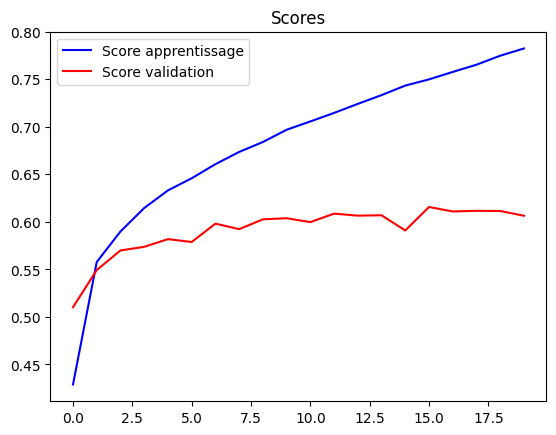

In [24]:
plot_scores(train)

In [27]:
# On remarque que le score d'apprentissage est plus haut que celui de validation donc il y a un overfitting

In [25]:
y_probabilities = model.predict(X_test)

y_cnn = np.argmax(y_probabilities, axis=1)


313/313 [==============================] - 3s 9ms/step


In [28]:
cm = confusion_matrix(y_cnn,y_test)
print(cm)
plt.figure(figsize = (12,10))



[[633  31  66  15  28  14   7  21 105  42]
 [ 25 707   5  17   7   7  17   5  58  92]
 [104  16 519 121 140 112  75  57  25  20]
 [ 20  18  79 432  66 210  78  61  19  28]
 [ 40   8 122 113 588  70 104 102  10  11]
 [  9   6  91 196  58 507  51  89  15  15]
 [  5   6  47  38  35  16 625   3   9   4]
 [ 11   8  33  26  57  43   6 621   4  20]
 [ 91  41  17  14  11  10   7   5 700  36]
 [ 62 159  21  28  10  11  30  36  55 732]]


<Figure size 1200x1000 with 0 Axes>

<Figure size 1200x1000 with 0 Axes>

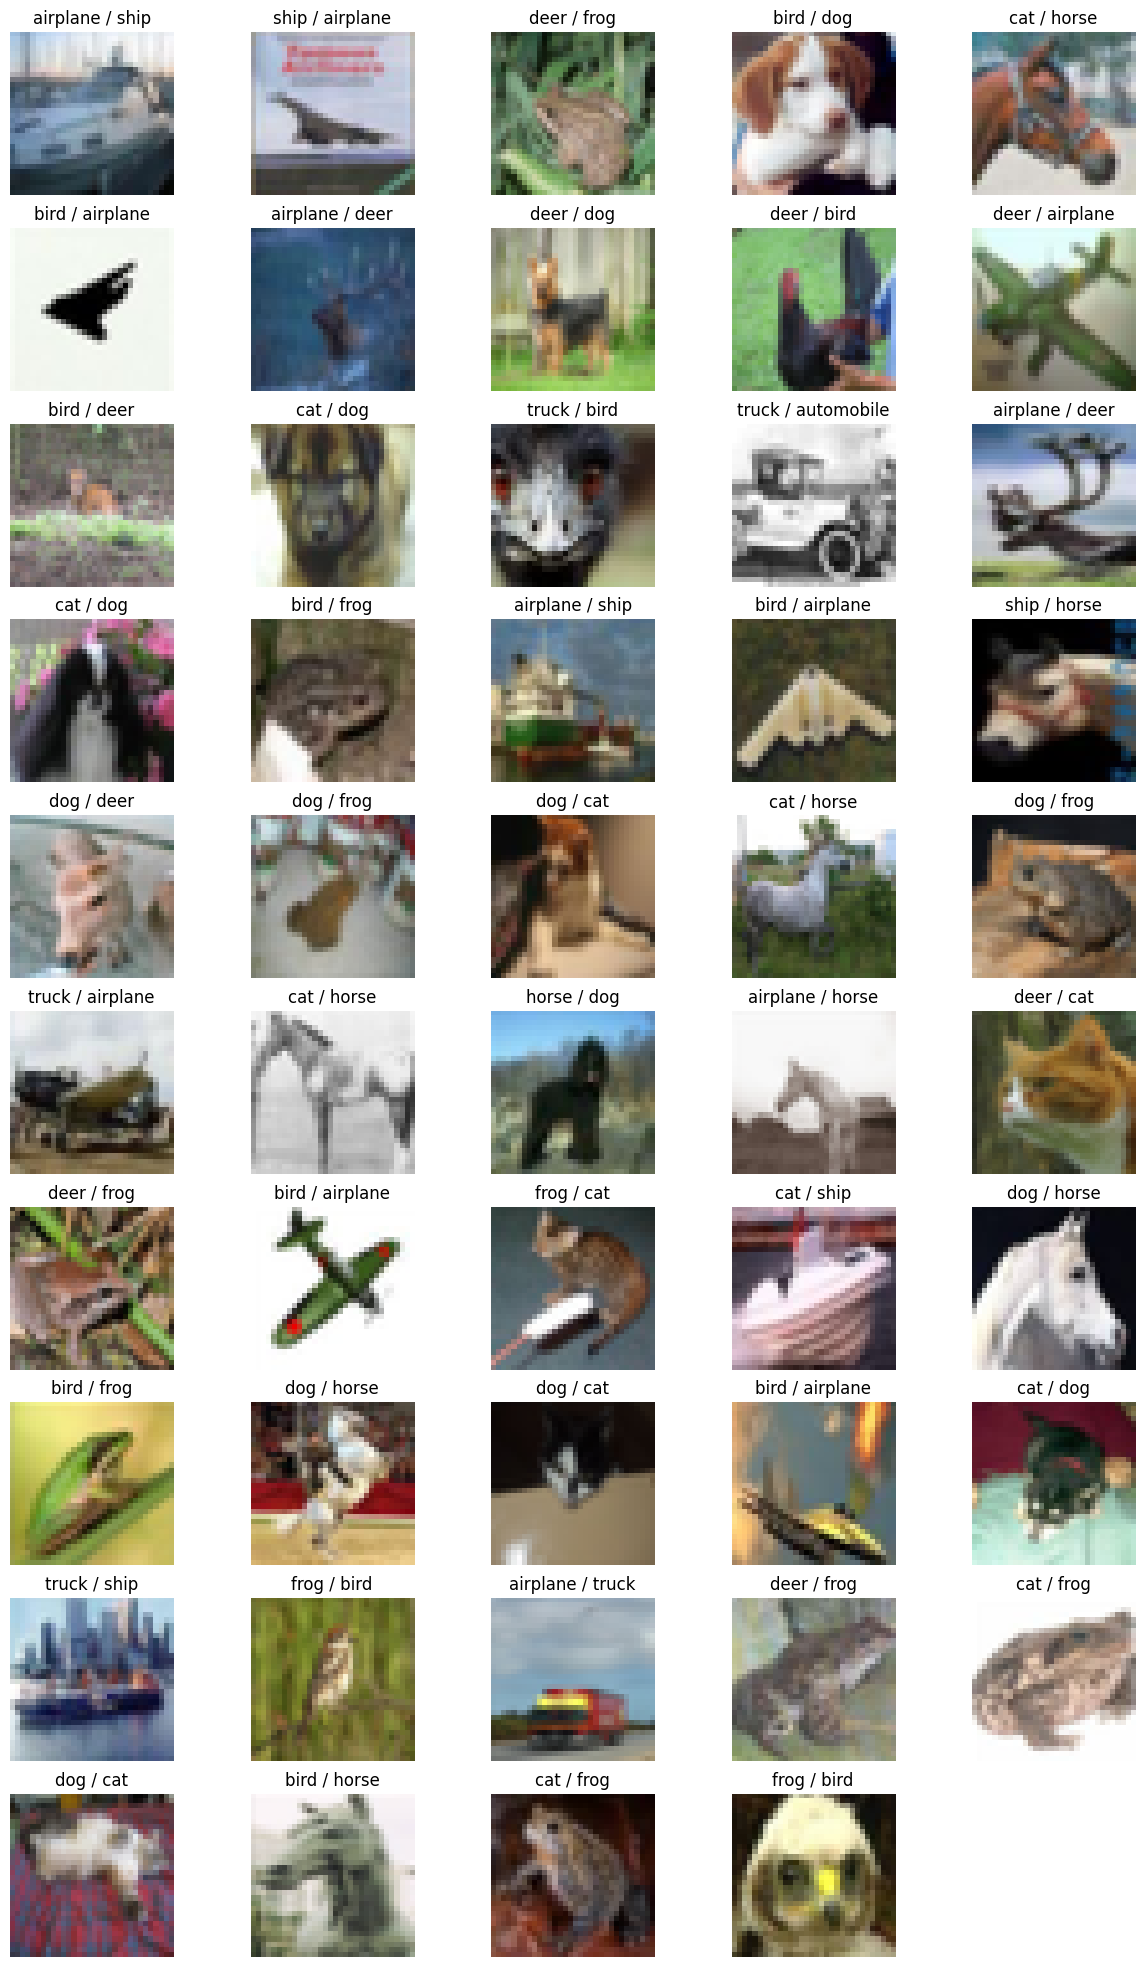

In [29]:
plt.figure(figsize=(15,25))
n_test = X_test.shape[0]
i=1
for j in range(len(X_test)) :
    if (y_cnn[j] != y_test[j]) & (i<50):
        plt.subplot(10,5,i)
        plt.axis('off')
        plt.imshow(X_test[j])
        pred_classe = y_cnn[j].argmax(axis=-1)
        plt.title('%s / %s' % (labels[int(y_cnn[j])], labels[int(y_test[j])]))
        i+=1

## Modèle CNN plus profond

In [30]:
%matplotlib inline

# Pandas : librairie de manipulation de données
# NumPy : librairie de calcul scientifique
# MatPlotLib : librairie de visualisation et graphiques
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn import model_selection
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score,auc, accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn import datasets
from keras.datasets import mnist
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical

In [31]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(32, 32, 3), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(20, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compilation du modèle
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [33]:
# Apprentissage
train = model.fit(X_train, y_train1, validation_data=(X_test, y_test1), epochs=50, batch_size=200, verbose=1)

# Test
scores = model.evaluate(X_test, y_test1, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Epoch 1/50
250/250 [==============================] - 172s 678ms/step - loss: 1.9683 - accuracy: 0.2472 - val_loss: 1.6838 - val_accuracy: 0.3753
Epoch 2/50
250/250 [==============================] - 167s 667ms/step - loss: 1.6357 - accuracy: 0.3895 - val_loss: 1.4690 - val_accuracy: 0.4640
Epoch 3/50
250/250 [==============================] - 166s 664ms/step - loss: 1.4887 - accuracy: 0.4479 - val_loss: 1.3396 - val_accuracy: 0.5110
Epoch 4/50
250/250 [==============================] - 170s 679ms/step - loss: 1.3865 - accuracy: 0.4910 - val_loss: 1.2984 - val_accuracy: 0.5323
Epoch 5/50
250/250 [==============================] - 168s 672ms/step - loss: 1.3059 - accuracy: 0.5237 - val_loss: 1.2128 - val_accuracy: 0.5720
Epoch 6/50
250/250 [==============================] - 162s 649ms/step - loss: 1.2424 - accuracy: 0.5469 - val_loss: 1.1601 - val_accuracy: 0.5953
Epoch 7/50
250/250 [==============================] - 172s 686ms/step - loss: 1.1896 - accuracy: 0.5705 - val_loss: 1.1028 -

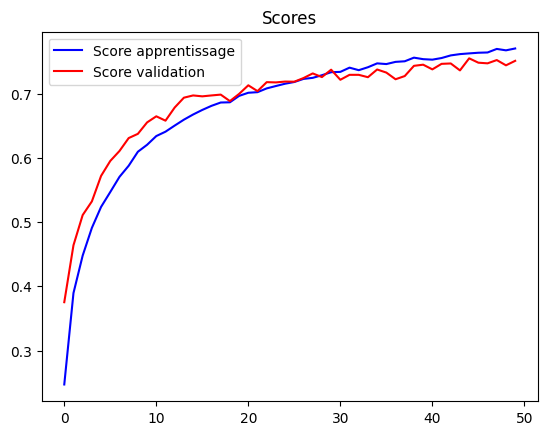

In [34]:
plot_scores(train)

In [36]:
model.save('mnist_cnn2.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [37]:
new_model = load_model('mnist_cnn2.h5')
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 14, 14, 32)        0         
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 conv2d_4 (Conv2D)           (None, 10, 10, 64)        36928     
                                                      

In [38]:
scores = new_model.evaluate(X_test, y_test1, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))

Score : 75.12%
